## Проект “Аналитика данных компании Gectaro”



### Описание проекта


Gectaro – облачный сервис для автоматизации управления строительством и ремонтом.
Компания продает софт с платной подпиской в сегменте B2B (наиболее частый срок подписки 12-24 месяца), предназначенный для управления процессами в сфере строительства и ремонта.
Основная проблема – это уход из сервиса большого количества подписчиков и не продление подписки.
 
Цель проекта


Проанализировать имеющиеся данные, составить портреты наиболее типичных клиентов, разобраться в причинах оттока клиентов, предложить решения по их минимизации. Для этого предлагается определить ключевые признаки для компаний, наличие которых (или их появление) влияет на отмену (отсутствие оплаты) подписки.
 
Задачи


1. Загрузка всех четырех файлов данных (activities.csv, billing.csv, companies.csv, people.csv) в Python.2. Предварительная обработка данных: проверка на отсутствие значений (NaN), преобразование форматов дат, удаление ненужных столбцов.
3. Провести исследовательский анализ данных
4. Сформулировать и проверить гипотезы на основании имеющихся принаков
5. Формулирование выводов по полученным результатам, подготовка презентации.


### Загрузка и первичная обработка информации
На первом этапе добавляем библиотеки

In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

Считаем CSV-файлы с данными с помощью библиотеки pandas,сохраним в датафреймы. Выведем и изучим общую информацию о датафреймах.

In [2]:
# Файл активностей (activities.csv):
activities = pd.read_csv('C:/datasets/activities.csv',index_col=0)
activities.info()
activities.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6316 entries, 0 to 6556
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_id                     6316 non-null   int64  
 1   month                          6316 non-null   object 
 2   company-month-billing          6316 non-null   float64
 3   company-month-stocks           6316 non-null   float64
 4   company-month-backups          6316 non-null   float64
 5   company-month-projects         6316 non-null   float64
 6   company-month-contractors      6316 non-null   float64
 7   company-month-resource_orders  6316 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 444.1+ KB


,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
0,1,2019-09-01 00:00:00+00:00,1.0,0.0,0.0,7.0,0.0,0.0
1,1,2019-12-01 00:00:00+00:00,1.0,0.0,0.0,2.0,1.0,0.0
2,1,2020-04-01 00:00:00+00:00,4.0,1.0,0.0,1.0,6.0,0.0
3,1,2020-07-01 00:00:00+00:00,1.0,7.0,3.0,5.0,0.0,0.0
4,21,2020-01-01 00:00:00+00:00,3.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# Подсчет уникальных идентификаторов компаний
unique_companies = len(activities['company_id'].unique())
print("Количество уникальных id компаний:", unique_companies)

Количество уникальных id компаний: 716


***Вывод:***  Файл активностей (activities.csv). Сгруппирован по компаниям, отсортирован по компаниям, а в пределах каждой компании - по месяцам. Всего в датафрейме 6316 записей. Всего в датасете 716 уникальных id компаний. Типы данных в столбцах 3-8 надо изменить на целочисленный, в столбце с датой - на тип даты.


In [4]:
# поменяем тип данных в столбце дата:
activities['month'] = pd.to_datetime(activities['month'])
# поменяем тип данных в столбцах:
df = ['company-month-billing','company-month-stocks','company-month-backups','company-month-projects','company-month-contractors','company-month-resource_orders'] 
activities[df] = activities[df].astype('int64')
activities.info()
activities.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6316 entries, 0 to 6556
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   company_id                     6316 non-null   int64              
 1   month                          6316 non-null   datetime64[ns, UTC]
 2   company-month-billing          6316 non-null   int64              
 3   company-month-stocks           6316 non-null   int64              
 4   company-month-backups          6316 non-null   int64              
 5   company-month-projects         6316 non-null   int64              
 6   company-month-contractors      6316 non-null   int64              
 7   company-month-resource_orders  6316 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(7)
memory usage: 444.1 KB


,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
0,1,2019-09-01 00:00:00+00:00,1,0,0,7,0,0
1,1,2019-12-01 00:00:00+00:00,1,0,0,2,1,0
2,1,2020-04-01 00:00:00+00:00,4,1,0,1,6,0
3,1,2020-07-01 00:00:00+00:00,1,7,3,5,0,0
4,21,2020-01-01 00:00:00+00:00,3,0,0,1,0,0


In [5]:
# Файл платежей (billing.csv):
billing = pd.read_csv('C:/datasets/billing.csv',index_col=0)
billing.info()
billing.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3480 entries, 4 to 18953
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3480 non-null   int64  
 1   id                       3480 non-null   int64  
 2   user_id                  3480 non-null   int64  
 3   company_id               3480 non-null   int64  
 4   billing_tariff_id        3480 non-null   int64  
 5   payed_until              3480 non-null   int64  
 6   is_payed                 3480 non-null   bool   
 7   created_at               3480 non-null   int64  
 8   updated_at               3480 non-null   int64  
 9   billing_tariff_price_id  3480 non-null   float64
 10  comment                  745 non-null    object 
 11  pay_date                 1108 non-null   float64
dtypes: bool(1), float64(2), int64(8), object(1)
memory usage: 329.6+ KB


,Unnamed: 0,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
4,4,3050,567,512,3,1640153302,False,1608617302,1608617302,12.0,NaN,NaN
6,6,3051,2861,2474,7,1640131200,True,1608626162,1608626181,23.0,NaN,1.608626e+09
16,16,3059,1902,1645,2,1616577484,False,1608801484,1608801484,6.0,NaN,NaN
18,18,3065,2352,2035,7,1643500799,False,1608883175,1608883175,23.0,NaN,NaN
24,24,3062,1074,926,3,1611964800,True,1608814072,1608899674,9.0,NaN,1.609200e+09


In [6]:
# Подсчет уникальных идентификаторов компаний
unique_companies = len(billing['company_id'].unique())
print("Количество уникальных id компаний:", unique_companies)

Количество уникальных id компаний: 1841


In [7]:
# Подсчет количества совпадающих id
matching_ids = len(set(activities['company_id']).intersection(billing['company_id']))

# Подсчет количества id, которые есть только в датасете activities
unique_to_activities = len(set(activities['company_id']) - set(billing['company_id']))

# Подсчет количества id, которые есть только в датасете billing
unique_to_billing = len(set(billing['company_id']) - set(activities['company_id']))

print(f"Количество совпадающих id: {matching_ids}")
print(f"Количество id, которые есть только в датасете activities: {unique_to_activities}")
print(f"Количество id, которые есть только в датасете billing: {unique_to_billing}")

Количество совпадающих id: 716
Количество id, которые есть только в датасете activities: 0
Количество id, которые есть только в датасете billing: 1125


***Вывод:***  Файл платежей (billing.csv).
 Всего в датафрейме 3480 записей. Количество уникальных id компаний в датасете - 1836. Количество совпадающих id в датасетах activities и  billing - 711. 
Количество id, которые есть только в датасете billin - 1125. Т.е. в датасете activities отражены активности не по всем компаниям. Типы данных в столбцах соответствуют их содержимому, только у столбцов с датой надо изменить тип на дату. Пропущены значения в столбцах с комментариями и датой платежа Предполагаем, что пропуски в дате платежа связаны с тем, что не все счета оплачены.

In [8]:
# поменяем тип данных в столбцах с датами:
billing['created_at'] = pd.to_datetime(billing['created_at'], unit= 's')
billing['updated_at'] = pd.to_datetime(billing['updated_at'], unit= 's')
billing['payed_until'] = pd.to_datetime(billing['payed_until'], unit= 's')
billing['pay_date'] = pd.to_datetime(billing['pay_date'], unit= 's')
billing.info()
billing.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3480 entries, 4 to 18953
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               3480 non-null   int64         
 1   id                       3480 non-null   int64         
 2   user_id                  3480 non-null   int64         
 3   company_id               3480 non-null   int64         
 4   billing_tariff_id        3480 non-null   int64         
 5   payed_until              3480 non-null   datetime64[ns]
 6   is_payed                 3480 non-null   bool          
 7   created_at               3480 non-null   datetime64[ns]
 8   updated_at               3480 non-null   datetime64[ns]
 9   billing_tariff_price_id  3480 non-null   float64       
 10  comment                  745 non-null    object        
 11  pay_date                 1108 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](4), float64

,Unnamed: 0,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
4,4,3050,567,512,3,2021-12-22 06:08:22,False,2020-12-22 06:08:22,2020-12-22 06:08:22,12.0,NaN,NaT
6,6,3051,2861,2474,7,2021-12-22 00:00:00,True,2020-12-22 08:36:02,2020-12-22 08:36:21,23.0,NaN,2020-12-22 08:36:21
16,16,3059,1902,1645,2,2021-03-24 09:18:04,False,2020-12-24 09:18:04,2020-12-24 09:18:04,6.0,NaN,NaT
18,18,3065,2352,2035,7,2022-01-29 23:59:59,False,2020-12-25 07:59:35,2020-12-25 07:59:35,23.0,NaN,NaT
24,24,3062,1074,926,3,2021-01-30 00:00:00,True,2020-12-24 12:47:52,2020-12-25 12:34:34,9.0,NaN,2020-12-29 00:00:00


In [9]:
# Файл компаний (companies.csv):
companies = pd.read_csv('C:/datasets/companies.csv',index_col=0)
companies.info()
companies.head()

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 19 to 17972
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       723 non-null    int64  
 1   working_direction        720 non-null    object 
 2   employer_count_interval  723 non-null    float64
 3   created_at               723 non-null    int64  
 4   updated_at               723 non-null    int64  
 5   billing_tariff_id        716 non-null    float64
 6   billing_is_over          723 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 40.2+ KB


,id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
19,514,-,1.0,1571316635,1670298314,4.0,True
57,383,Строительство,2.0,1564142565,1676550050,7.0,False
69,495,-,1.0,1570535695,1598281714,2.0,False
75,724,-,1.0,1579514393,1670298294,4.0,True
99,471,-,1.0,1569328017,1670298360,7.0,True


In [10]:
# Подсчет уникальных идентификаторов компаний
unique_companies = len(companies['id'].unique())
print("Количество уникальных id компаний:", unique_companies)

Количество уникальных id компаний: 723


In [11]:
# Подсчет количества совпадающих id
matching_ids = len(set(activities['company_id']) & set(billing['company_id']) & set(companies['id']))

# Подсчет количества id, которые отсутствуют в других датасетах
missing_ids_activities = set(activities['company_id']) - set(billing['company_id']) - set(companies['id'])
missing_ids_billing = set(billing['company_id']) - set(activities['company_id']) - set(companies['id'])
missing_ids_companies = set(companies['id']) - set(activities['company_id']) - set(billing['company_id'])

print(f"Количество совпадающих id: {matching_ids}")
print(f"Количество id, которых нет в billing и companies: {len(missing_ids_activities)}")
print(f"Количество id, которых нет в activities и companies: {len(missing_ids_billing)}")
print(f"Количество id, которых нет в activities и billing: {len(missing_ids_companies)}")

Количество совпадающих id: 716
Количество id, которых нет в billing и companies: 0
Количество id, которых нет в activities и companies: 1125
Количество id, которых нет в activities и billing: 7


***Вывод:***  Файл компаний (companies.csv). Всего в датафрейме 723 записей. По количеству компаний датасет не совпадает с предыдущими датасетами. Есть 7, которых нет в предыдущих датасетах.  Типы данных в столбцах соответствуют их содержимому, только у столбцов с датой надо изменить тип на дату. Пропущены значения в столбцах со сферой деятельности компаний и id тарифа.

In [12]:
# поменяем тип данных в столбцах с датами:
companies['created_at'] = pd.to_datetime(companies['created_at'], unit= 's')
companies['updated_at'] = pd.to_datetime(companies['updated_at'], unit= 's')
companies.info()
companies.head()

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 19 to 17972
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       723 non-null    int64         
 1   working_direction        720 non-null    object        
 2   employer_count_interval  723 non-null    float64       
 3   created_at               723 non-null    datetime64[ns]
 4   updated_at               723 non-null    datetime64[ns]
 5   billing_tariff_id        716 non-null    float64       
 6   billing_is_over          723 non-null    bool          
dtypes: bool(1), datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 40.2+ KB


,id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
19,514,-,1.0,2019-10-17 12:50:35,2022-12-06 03:45:14,4.0,True
57,383,Строительство,2.0,2019-07-26 12:02:45,2023-02-16 12:20:50,7.0,False
69,495,-,1.0,2019-10-08 11:54:55,2020-08-24 15:08:34,2.0,False
75,724,-,1.0,2020-01-20 09:59:53,2022-12-06 03:44:54,4.0,True
99,471,-,1.0,2019-09-24 12:26:57,2022-12-06 03:46:00,7.0,True


In [13]:
# Файл компаний (companies.csv):
people = pd.read_csv('C:/datasets/people.csv',index_col=0)
people.info()
people.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5095 entries, 2 to 17054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5095 non-null   int64  
 1   company_id  5095 non-null   int64  
 2   user_id     3813 non-null   float64
 3   role_id     5095 non-null   int64  
 4   created_at  5095 non-null   int64  
 5   updated_at  5095 non-null   int64  
 6   is_deleted  5095 non-null   bool   
 7   deleted_at  2180 non-null   float64
dtypes: bool(1), float64(2), int64(5)
memory usage: 323.4 KB


,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
2,6601,495,NaN,7133,1570535962,1570535962,True,1.594067e+09
6,7025,1,NaN,1,1594120484,1594120484,True,1.594120e+09
7,7165,1255,1734.0,18085,1595438102,1595439391,True,1.633960e+09
10,7130,1470,1703.0,1,1595234824,1595234824,False,NaN
17,7163,1492,1731.0,1,1595429211,1598540644,True,1.620195e+09


In [14]:
# Подсчет уникальных идентификаторов компаний
unique_companies = len(people['company_id'].unique())
print("Количество уникальных id компаний:", unique_companies)

Количество уникальных id компаний: 712


In [15]:
# Получение уникальных значений company_id из каждого датасета
activities_ids = set(activities['company_id'])
billing_ids = set(billing['company_id'])
companies_ids = set(companies['id'])
people_ids = set(people['company_id'])
# Подсчет количества совпадающих id
common_ids = activities_ids.intersection(billing_ids, companies_ids, people_ids)
count_common_ids = len(common_ids)

# Подсчет количества id, которых нет в других датасетах
unique_activities_ids = activities_ids.difference(billing_ids, companies_ids, people_ids)
unique_billing_ids = billing_ids.difference(activities_ids, companies_ids, people_ids)
unique_companies_ids = companies_ids.difference(activities_ids, billing_ids, people_ids)
unique_people_ids = people_ids.difference(activities_ids, billing_ids, companies_ids)

count_unique_activities = len(unique_activities_ids)
count_unique_billing = len(unique_billing_ids)
count_unique_companies = len(unique_companies_ids)
count_unique_people = len(unique_people_ids)

print(f"Количество совпадающих id: {count_common_ids}")
print(f"Количество id, которых нет в других датасетах:")
print(f"В activities: {count_unique_activities}")
print(f"В billing: {count_unique_billing}")
print(f"В companies: {count_unique_companies}")
print(f"В people: {count_unique_people}")

Количество совпадающих id: 706
Количество id, которых нет в других датасетах:
В activities: 0
В billing: 1125
В companies: 1
В people: 0


***Вывод:*** Файл сотрудников (people.csv). Всего в датафрейме 5095 записей. Количество уникальных id компаний в датасете- 712.  В результате в 4 датасетах совпадают 701 id компаний. Типы данных в столбцах соответствуют их содержимому, только у столбцов с датой надо изменить тип на дату. Пропущены значения в столбцах с датой удаления и id пользователя.

In [16]:
# поменяем тип данных в столбцах с датами:
people['created_at'] = pd.to_datetime(people['created_at'], unit= 's')
people['updated_at'] = pd.to_datetime(people['updated_at'], unit= 's')
people['deleted_at'] = pd.to_datetime(people['deleted_at'], unit= 's')
people.info()
people.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5095 entries, 2 to 17054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5095 non-null   int64         
 1   company_id  5095 non-null   int64         
 2   user_id     3813 non-null   float64       
 3   role_id     5095 non-null   int64         
 4   created_at  5095 non-null   datetime64[ns]
 5   updated_at  5095 non-null   datetime64[ns]
 6   is_deleted  5095 non-null   bool          
 7   deleted_at  2180 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](3), float64(1), int64(3)
memory usage: 323.4 KB


,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
2,6601,495,NaN,7133,2019-10-08 11:59:22,2019-10-08 11:59:22,True,2020-07-06 20:19:28
6,7025,1,NaN,1,2020-07-07 11:14:44,2020-07-07 11:14:44,True,2020-07-07 11:14:48
7,7165,1255,1734.0,18085,2020-07-22 17:15:02,2020-07-22 17:36:31,True,2021-10-11 13:48:02
10,7130,1470,1703.0,1,2020-07-20 08:47:04,2020-07-20 08:47:04,False,NaT
17,7163,1492,1731.0,1,2020-07-22 14:46:51,2020-08-27 15:04:04,True,2021-05-05 06:15:18


### Предобработка данных


In [17]:
# Проверяем наличие дубликатов
duplicates = activities[activities.duplicated()]

if not duplicates.empty:
    print("Найдены явные дубликаты:")
    print(duplicates)
else:
    print("Дубликатов не найдено.")

# Проверяем наличие пропущенных значений
missing_values = activities.isnull().sum()

if missing_values.any():
    print("\nНайдены пропущенные значения:")
    print(missing_values)
else:
    print("\nПропущенных значений не найдено.")

Дубликатов не найдено.

Пропущенных значений не найдено.


In [18]:
# Проверяем наличие дубликатов
duplicates = billing[billing.duplicated()]

if not duplicates.empty:
    print("Найдены явные дубликаты:")
    print(duplicates)
else:
    print("Дубликатов не найдено.")

# Проверяем наличие пропущенных значений
missing_values = billing.isnull().sum()

if missing_values.any():
    print("\nНайдены пропущенные значения:")
    print(missing_values)
else:
    print("\nПропущенных значений не найдено.")

Дубликатов не найдено.

Найдены пропущенные значения:
Unnamed: 0                    0
id                            0
user_id                       0
company_id                    0
billing_tariff_id             0
payed_until                   0
is_payed                      0
created_at                    0
updated_at                    0
billing_tariff_price_id       0
comment                    2735
pay_date                   2372
dtype: int64


In [19]:
# удалим строки с тестовыми и архивным тарифами
test_tariffs = [1, 18, 22]
billing = billing[~billing['billing_tariff_id'].isin(test_tariffs + [6])]
billing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3463 entries, 4 to 18953
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               3463 non-null   int64         
 1   id                       3463 non-null   int64         
 2   user_id                  3463 non-null   int64         
 3   company_id               3463 non-null   int64         
 4   billing_tariff_id        3463 non-null   int64         
 5   payed_until              3463 non-null   datetime64[ns]
 6   is_payed                 3463 non-null   bool          
 7   created_at               3463 non-null   datetime64[ns]
 8   updated_at               3463 non-null   datetime64[ns]
 9   billing_tariff_price_id  3463 non-null   float64       
 10  comment                  742 non-null    object        
 11  pay_date                 1100 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](4), float64

In [20]:
# Проверяем наличие дубликатов
duplicates = companies[companies.duplicated()]

if not duplicates.empty:
    print("Найдены явные дубликаты:")
    print(duplicates)
else:
    print("Дубликатов не найдено.")

# Проверяем наличие пропущенных значений
missing_values = companies.isnull().sum()

if missing_values.any():
    print("\nНайдены пропущенные значения:")
    print(missing_values)
else:
    print("\nПропущенных значений не найдено.")

Дубликатов не найдено.

Найдены пропущенные значения:
id                         0
working_direction          3
employer_count_interval    0
created_at                 0
updated_at                 0
billing_tariff_id          7
billing_is_over            0
dtype: int64


In [21]:
# Проверяем наличие дубликатов
duplicates = people[people.duplicated()]

if not duplicates.empty:
    print("Найдены явные дубликаты:")
    print(duplicates)
else:
    print("Дубликатов не найдено.")

# Проверяем наличие пропущенных значений
missing_values = people.isnull().sum()

if missing_values.any():
    print("\nНайдены пропущенные значения:")
    print(missing_values)
else:
    print("\nПропущенных значений не найдено.")

Дубликатов не найдено.

Найдены пропущенные значения:
id               0
company_id       0
user_id       1282
role_id          0
created_at       0
updated_at       0
is_deleted       0
deleted_at    2915
dtype: int64


***Вывод:*** Явных дубликатов в датафреймах не найдено. В датафрейме платежей удалим строки с тестовыми и архивным тарифами. Пропущенные значения в датафреймах не удаляем, т.к. считаем, что они не повлияют на выводы.

### Исследовательский анализ данных

Определим период, в который были проведены регистрации и платежи

In [22]:
# Нахождение максимальной и минимальной даты по каждому столбцу
max_created_at = billing['created_at'].max()
min_created_at = billing['created_at'].min()

max_updated_at = billing['updated_at'].max()
min_updated_at = billing['updated_at'].min()

max_pay_date = billing['pay_date'].max()
min_pay_date = billing['pay_date'].min()

print("Максимальная дата создания записи:", max_created_at)
print("Минимальная дата создания записи:", min_created_at)

print("Максимальная дата обновления записи:", max_updated_at)
print("Минимальная дата обновления записи:", min_updated_at)

print("Максимальная дата платежа:", max_pay_date)
print("Минимальная дата платежа:", min_pay_date)

Максимальная дата создания записи: 2024-03-13 10:24:06
Минимальная дата создания записи: 2019-07-23 09:32:39
Максимальная дата обновления записи: 2024-03-13 10:26:17
Минимальная дата обновления записи: 2019-07-23 09:32:39
Максимальная дата платежа: 2024-03-15 00:00:00
Минимальная дата платежа: 2020-12-16 12:43:27


Дата внесения первой записи 23 июля 2019 г., а дата первого платежа 16 декабря 2020 г., т.е.первая оплата произошла через 5 месяцев после первой регистрации.

Посмотрим, сколько было регистраций компаниями по период.

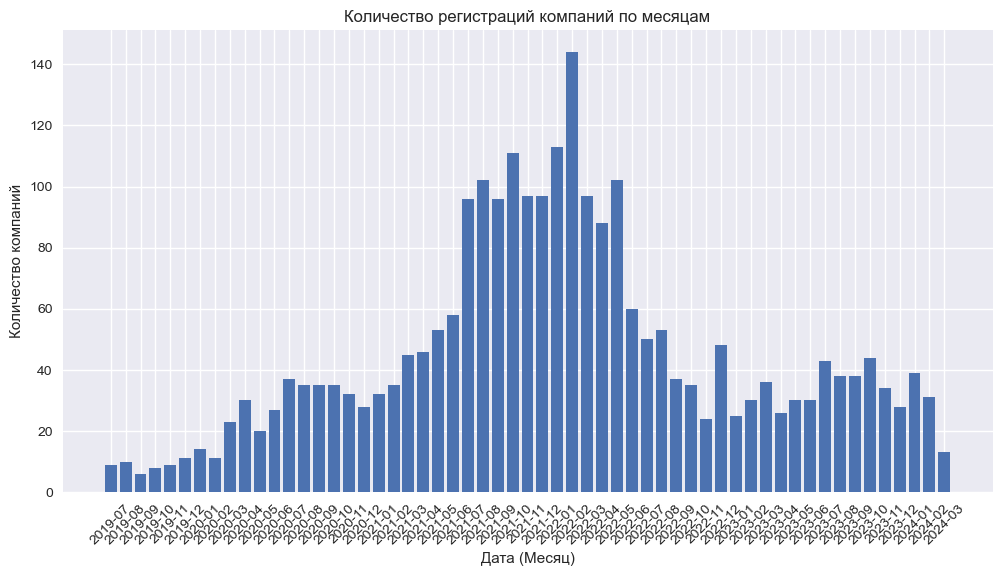

In [23]:
# Создадим новый столбец с месяцем для каждой даты создания
billing['created_month'] = billing['created_at'].dt.to_period('M')

# Сгруппируем данные по месяцу создания и посчитаем количество уникальных company_id
data = billing.groupby('created_month')['company_id'].nunique()

# Построим график
plt.figure(figsize=(12, 6))
plt.bar(data.index.astype(str), data.values)
plt.xlabel('Дата (Месяц)')
plt.ylabel('Количество компаний')
plt.title('Количество регистраций компаний по месяцам')
plt.xticks(rotation=45)
plt.show()

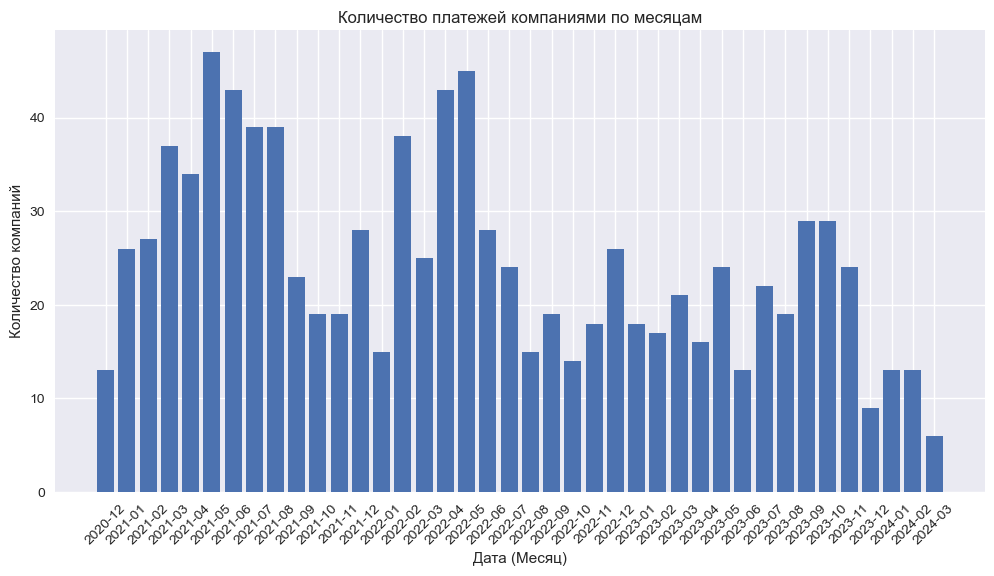

In [24]:
# Создадим новый столбец с месяцем для каждой даты создания
billing['pay_month'] = billing['pay_date'].dt.to_period('M')

# Сгруппируем данные по месяцу создания и посчитаем количество уникальных company_id
data = billing.groupby('pay_month')['company_id'].nunique()

# Построим график
plt.figure(figsize=(12, 6))
plt.bar(data.index.astype(str), data.values)
plt.xlabel('Дата (Месяц)')
plt.ylabel('Количество компаний')
plt.title('Количество платежей компаниями по месяцам')
plt.xticks(rotation=45)
plt.show()

Резкий рост регистраций и оплат наблюдался в июне 2021 г. Посмотрим, сколько оплат было по признаку факта оплаты, т.к. в датасете не совпадают значения в столбцах статуса оплаты и даты платежа, т.е. не всегда указана дата платежа. 

Посмотрим, какие периоды была активна подписка компаний в датасете billing 

In [25]:
# Расчет активности подписки
billing['subscription_activity'] = billing['payed_until'] - billing['created_at']

# Вывод первых 5 строк для проверки
billing.head()

,Unnamed: 0,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date,created_month,pay_month,subscription_activity
4,4,3050,567,512,3,2021-12-22 06:08:22,False,2020-12-22 06:08:22,2020-12-22 06:08:22,12.0,NaN,NaT,2020-12,NaT,365 days 00:00:00
6,6,3051,2861,2474,7,2021-12-22 00:00:00,True,2020-12-22 08:36:02,2020-12-22 08:36:21,23.0,NaN,2020-12-22 08:36:21,2020-12,2020-12,364 days 15:23:58
16,16,3059,1902,1645,2,2021-03-24 09:18:04,False,2020-12-24 09:18:04,2020-12-24 09:18:04,6.0,NaN,NaT,2020-12,NaT,90 days 00:00:00
18,18,3065,2352,2035,7,2022-01-29 23:59:59,False,2020-12-25 07:59:35,2020-12-25 07:59:35,23.0,NaN,NaT,2020-12,NaT,400 days 16:00:24
24,24,3062,1074,926,3,2021-01-30 00:00:00,True,2020-12-24 12:47:52,2020-12-25 12:34:34,9.0,NaN,2020-12-29 00:00:00,2020-12,2020-12,36 days 11:12:08


C:\Users\Админ\AppData\Local\Temp\ipykernel_9628\1996670595.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = billing.groupby('subscription_group')['company_id'].nunique()



Распределение компаний по срокам активности подписки:
subscription_group
до месяца       121
на 3 месяца     172
на полгода      212
на 9 месяцев    346
на год          487
на 1,5 года     767
свыше 2 лет     168
Name: company_id, dtype: int64


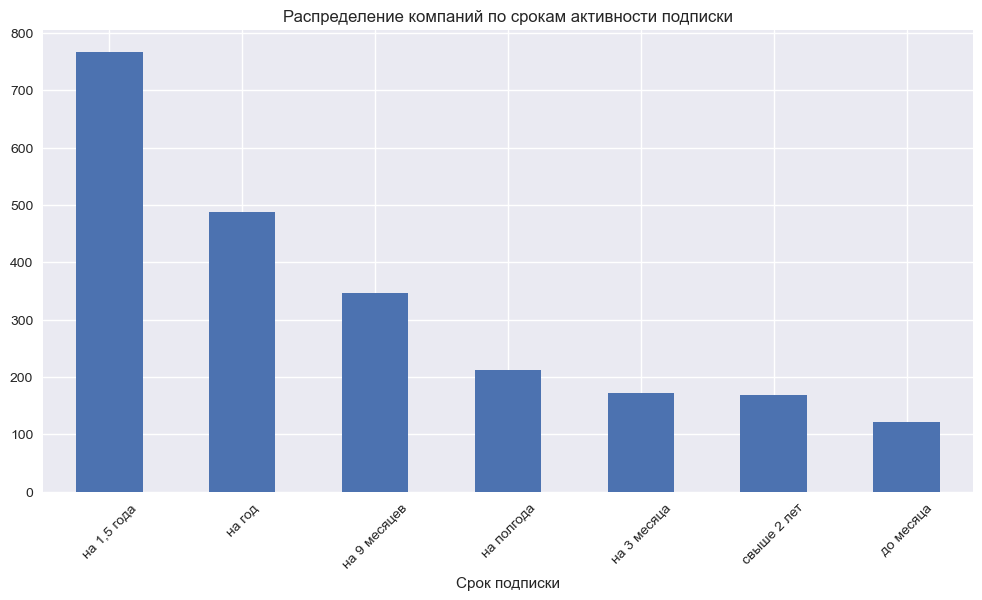

In [26]:
# Определение временных интервалов
bins = [pd.Timedelta(days=30), pd.Timedelta(days=90), pd.Timedelta(days=180), pd.Timedelta(days=270), pd.Timedelta(days=365), pd.Timedelta(days=540), pd.Timedelta(days=730), pd.Timedelta(days=3650)]

# Названия групп
group_names = ['до месяца', 'на 3 месяца', 'на полгода', 'на 9 месяцев', 'на год', 'на 1,5 года', 'свыше 2 лет']

# Создание нового столбца с категориями временных интервалов
billing['subscription_group'] = pd.cut(billing['subscription_activity'], bins, labels=group_names)

# Выводим информацию о распределении компаний по группам 
group_counts = billing.groupby('subscription_group')['company_id'].nunique()
print("\nРаспределение компаний по срокам активности подписки:")
print(group_counts)

# построим график
group_counts =group_counts.sort_values(ascending=False)
# строим график
group_counts.plot(grid=True, kind='bar', figsize=(12,6))
plt.title("Распределение компаний по срокам активности подписки")
plt.xlabel('Срок подписки')
plt.xticks(rotation=45)
plt.show()

Большая часть компаний выбирает подписку на срок больше 9 месяцев.

Распределим компании по тарифным группам


Распределение компаний по группам тарифов:
group
Профи      108
базовый    969
бизнес     195
старт      815
Name: company_id, dtype: int64
Количество компаний, выбравших несколько тарифов: 566


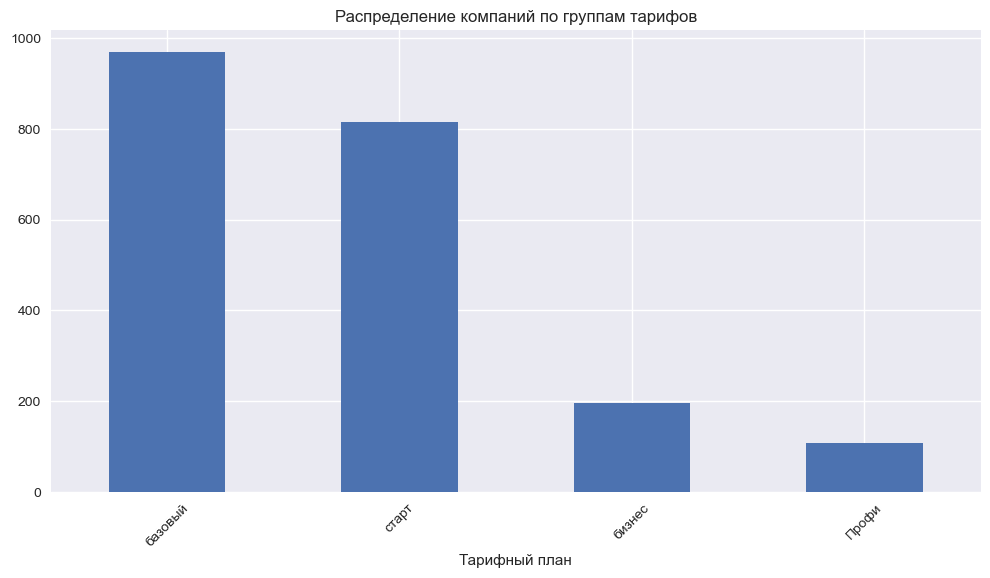

In [27]:
# создаем словарь с соответствием тарифов к группам
tariff_groups = {4: 'старт', 7: 'старт', 8: 'старт', 11: 'старт', 19: 'старт',
                 2: 'базовый', 17: 'базовый',
                 9: 'бизнес', 20: 'бизнес',
                 3: 'Профи', 10: 'Профи', 13: 'Профи', 21: 'Профи'}

# добавляем новый столбец 'group' с названием группы тарифа для каждой компании
billing['group'] = billing['billing_tariff_id'].map(tariff_groups)

# Выводим информацию о распределении компаний по группам тарифов
group_counts = billing.groupby('group')['company_id'].nunique()
print("\nРаспределение компаний по группам тарифов:")
print(group_counts)

# Определяем количество компаний, выбравших несколько тарифов
multiple_tariffs = billing.groupby('company_id').size().reset_index(name='count')
multiple_tariffs = multiple_tariffs[multiple_tariffs['count'] > 1]

print("Количество компаний, выбравших несколько тарифов:", len(multiple_tariffs))

# построим график
group_counts =group_counts.sort_values(ascending=False)
# строим график
group_counts.plot(grid=True, kind='bar', figsize=(12,6))
plt.title("Распределение компаний по группам тарифов")
plt.xlabel('Тарифный план')
plt.xticks(rotation=45)
plt.show()

***Вывод:*** В подавляющем большинстве компании-клиенты выбирают тариф старт и базовый. 566 компаний, выбравших более 1 тарифа, это компании, перешедшие с одного тарифа на другой.

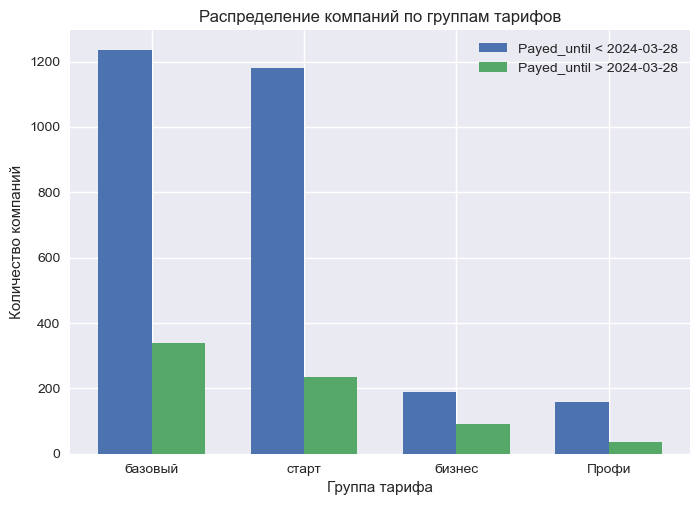

In [28]:
# Фильтруем данные по условию Payed_until < '2024-03-28'
expired_subscriptions = billing[billing['payed_until'] < '2024-03-28']

# Фильтруем данные по условию Payed_until > '2024-03-28'
active_subscriptions = billing[billing['payed_until'] > '2024-03-28']

# Подсчет количества компаний по группам тарифов
expired_counts = expired_subscriptions['group'].value_counts()
active_counts = active_subscriptions['group'].value_counts()

# Расчет отношения количества компаний с Payed_until > '2024-03-28' к количеству компаний с Payed_until < '2024-03-28'
ratio = active_counts / expired_counts

# Строим гистограмму
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(group_counts))

bar1 = ax.bar(index, expired_counts, bar_width, label='Payed_until < 2024-03-28')
bar2 = ax.bar(index + bar_width, active_counts, bar_width, label='Payed_until > 2024-03-28')

ax.set_xlabel('Группа тарифа')
ax.set_ylabel('Количество компаний')
ax.set_title('Распределение компаний по группам тарифов')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(group_counts.index)
ax.legend()

plt.show()

Если взять дату 28.03.2024 за отчетную, можно сравнить у скольких компаний подписка закончилась и сколько продлили, и посмотреть на их соотношение. Самый лучший показатель у тарифа бизнес, почти половина имевших подписку до отчетной даты, продлили ее. У остальных тарифов этот показатель на уровне 20-25%.  

In [ ]:
Посмотрим сколько было смен тарифов

Количество организаций, сменивших тарифы: 1866


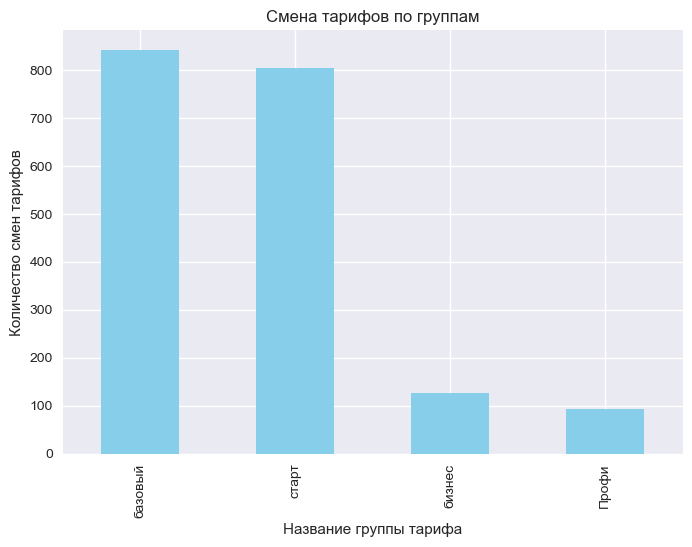

In [45]:
# Фильтрация изменений тарифов
changed_tariffs = billing[billing.duplicated(subset=['company_id', 'billing_tariff_id'], keep=False)]

# Вывод информации о смене тарифов
print("Количество организаций, сменивших тарифы:", len(changed_tariffs))

# Построение графика количества смен тарифов по группам
group_counts = changed_tariffs['group'].value_counts()
group_counts.plot(kind='bar', color='skyblue')
plt.title('Смена тарифов по группам')
plt.xlabel('Название группы тарифа')
plt.ylabel('Количество смен тарифов')
plt.show()

Посмотрим, сколько компаний оплатили и не оплатили счета. Ориентир - факт оплаты в столбце 'is_payed'.

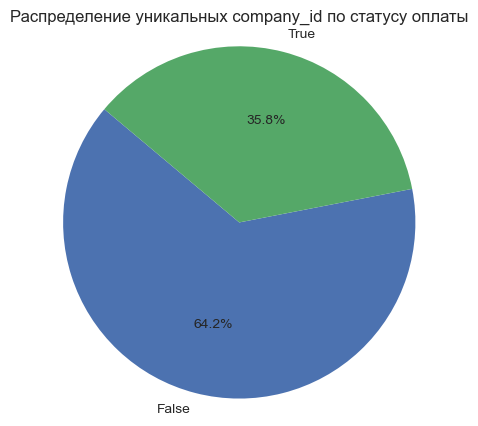

is_payed
False    1384
True      773
Name: company_id, dtype: int64


In [30]:
# Группируем данные по столбцу 'is_payed' и считаем количество уникальных значений столбца 'company_id'
result = billing.groupby('is_payed')['company_id'].nunique()

# Построение круговой диаграммы
plt.figure(figsize=(5, 5))
plt.pie(result, labels=result.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  

plt.title('Распределение уникальных company_id по статусу оплаты')
plt.show()
print (result)

64,2% всех компаний в датасете billing не оплатили счета, 773 - оплатили. Выделим датасет с компаниями, оплатившими счет.

In [31]:
# создаем новый датасет с данными, где 'is_payed' равен True
new_billing = billing[billing['is_payed'] == True]

# выводим на экран новый датасет для проверки
print(new_billing.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1106 entries, 6 to 18953
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Unnamed: 0               1106 non-null   int64          
 1   id                       1106 non-null   int64          
 2   user_id                  1106 non-null   int64          
 3   company_id               1106 non-null   int64          
 4   billing_tariff_id        1106 non-null   int64          
 5   payed_until              1106 non-null   datetime64[ns] 
 6   is_payed                 1106 non-null   bool           
 7   created_at               1106 non-null   datetime64[ns] 
 8   updated_at               1106 non-null   datetime64[ns] 
 9   billing_tariff_price_id  1106 non-null   float64        
 10  comment                  708 non-null    object         
 11  pay_date                 864 non-null    datetime64[ns] 
 12  created_month           

Сравним по уникальным id компании, которые оплатили и отражены в датасете billing и companies.

In [32]:
# Сравнение значений столбца 'company_id'
common_ids = set(new_billing['company_id']).intersection(set(companies['id']))

# Разделение датасета billing на два датасета
billing_common = new_billing[new_billing['company_id'].isin(common_ids)]
billing_not_common = new_billing[~new_billing['company_id'].isin(common_ids)]

# Вывод результатов
print("Датасет new_billing с общими company_id:")
print(billing_common.info())

print("Датасет new_billing без общих company_id:")
print(billing_not_common.info())

Датасет new_billing с общими company_id:
<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 24 to 18953
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Unnamed: 0               1024 non-null   int64          
 1   id                       1024 non-null   int64          
 2   user_id                  1024 non-null   int64          
 3   company_id               1024 non-null   int64          
 4   billing_tariff_id        1024 non-null   int64          
 5   payed_until              1024 non-null   datetime64[ns] 
 6   is_payed                 1024 non-null   bool           
 7   created_at               1024 non-null   datetime64[ns] 
 8   updated_at               1024 non-null   datetime64[ns] 
 9   billing_tariff_price_id  1024 non-null   float64        
 10  comment                  696 non-null    object         
 11  pay_date                 796 non-null    dat

In [33]:
# Подсчет уникальных идентификаторов компаний
unique_companies = len(billing_common['company_id'].unique())
print("Количество уникальных id компаний:", unique_companies)

Количество уникальных id компаний: 710


***Вывод:*** Предполагаем, что в датасете companies сформирована информация по компаниям-клиентам, которые совершали оплату. Но нет информации о клиентах, которые допустим, продлили подписку, но еще не оплатили счета. 

Посмотрим, сколько компаний продлили подписку вне зависимости от факта оплаты

In [34]:
# Выделение данных, где 'payed_until' больше 28.03.2024
filtered_billing = billing[billing['payed_until'] > '2024-03-28']


# Группировка значений столбца 'company_id' по значению в столбце 'is_payed'
grouped_data = filtered_billing.groupby('is_payed')['company_id'].nunique()
unique_companies = len(filtered_billing['company_id'].unique())
print("Количество уникальных id компаний:", unique_companies)
print(grouped_data)

Количество уникальных id компаний: 440
is_payed
False    261
True     240
Name: company_id, dtype: int64


***Вывод:*** Таким образом, если выбрать в качестве показателя ухода компании дату продления, на 28 марта 2024 г. осталось 440 компаний-клиентов.

Посмотрим активность компаний, которые решили продолжать пользоваться сервисом. 

In [35]:
# Найдем уникальные значения 'company_id' в обоих датасетах
unique_company_ids_filtered_billing = set(filtered_billing['company_id'])
unique_company_ids_activities = set(activities['company_id'])

# Разделим filtered_billing на два датасета
company_ids_in_both = unique_company_ids_filtered_billing.intersection(unique_company_ids_activities)
filtered_billing_in_companies = filtered_billing[filtered_billing['company_id'].isin(company_ids_in_both)]
filtered_billing_not_in_companies = filtered_billing[~filtered_billing['company_id'].isin(company_ids_in_both)]

# В filtered_billing_in_companies будут только те строки, у которых 'company_id' есть в обоих датасетах
# В filtered_billing_not_in_companies будут только те строки, у которых 'company_id' нет в activities
filtered_billing_in_companies.info()
filtered_billing_not_in_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 204 to 18953
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Unnamed: 0               333 non-null    int64          
 1   id                       333 non-null    int64          
 2   user_id                  333 non-null    int64          
 3   company_id               333 non-null    int64          
 4   billing_tariff_id        333 non-null    int64          
 5   payed_until              333 non-null    datetime64[ns] 
 6   is_payed                 333 non-null    bool           
 7   created_at               333 non-null    datetime64[ns] 
 8   updated_at               333 non-null    datetime64[ns] 
 9   billing_tariff_price_id  333 non-null    float64        
 10  comment                  212 non-null    object         
 11  pay_date                 231 non-null    datetime64[ns] 
 12  created_month          

Для файла активностей построим матрицу корреляций

In [36]:
# Выделение уникальных значений столбца 'company_id' из датасета activities
unique_company_ids = activities['company_id'].unique()

# Фильтрация строк с уникальными значениями 'company_id', которые совпадают с filtered_billing_in_companies
result = activities[activities['company_id'].isin(filtered_billing_in_companies['company_id']) & activities['company_id'].isin(unique_company_ids)]

# Вывод результата
result.info()
result.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2786 entries, 65 to 6556
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   company_id                     2786 non-null   int64              
 1   month                          2786 non-null   datetime64[ns, UTC]
 2   company-month-billing          2786 non-null   int64              
 3   company-month-stocks           2786 non-null   int64              
 4   company-month-backups          2786 non-null   int64              
 5   company-month-projects         2786 non-null   int64              
 6   company-month-contractors      2786 non-null   int64              
 7   company-month-resource_orders  2786 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(7)
memory usage: 195.9 KB


,company_id,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
count,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000
mean,5513.030151,0.304738,8.545585,1.316224,8.375090,10.330581,17.255922
std,2327.200104,0.702465,14.767434,3.386339,16.197934,35.833449,55.314737
min,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3865.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,5790.000000,0.000000,3.000000,0.000000,3.000000,2.000000,0.000000
75%,7297.250000,0.000000,9.000000,0.000000,8.000000,9.000000,7.000000
max,9931.000000,7.000000,150.000000,22.000000,221.000000,1014.000000,1182.000000


***Вывод:*** Компании очень мало используют функционал приложения для выставления счетов, в среднем компании используют в месяц 8 складов, работают с 10 контрагентами и 17 раз заказывают материалы. Максимальные значения имеют сильное отклонение, построим boxplot.

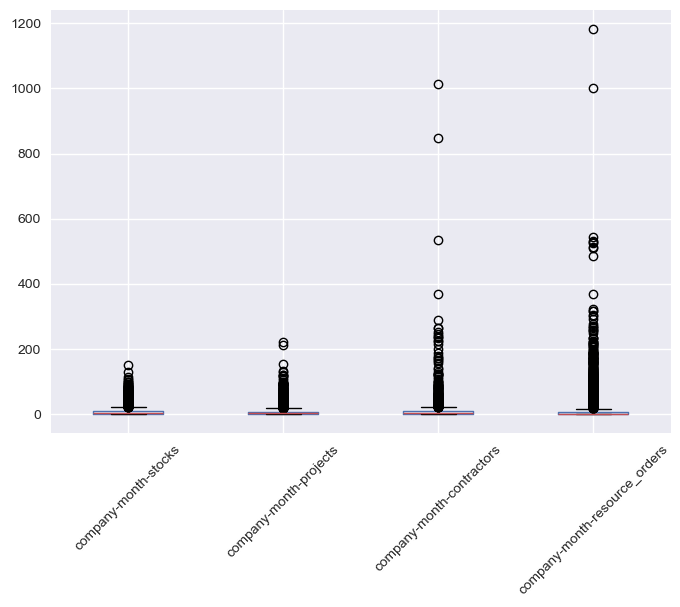

In [37]:
data = result.drop(columns=["company_id", 'company-month-billing','company-month-backups'])
data.boxplot()
plt.xticks(rotation=45)
plt.show()

In [38]:
# Выбор нужных столбцов для анализа
selected_columns = result[['company-month-billing', 'company-month-stocks', 'company-month-backups', 
                         'company-month-projects', 'company-month-contractors', 'company-month-resource_orders']]

# Построение матрицы корреляций
correlation_matrix = selected_columns.corr()
correlation_matrix

,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
company-month-billing,1.000000,-0.048847,-0.095922,-0.075592,-0.001664,-0.050272
company-month-stocks,-0.048847,1.000000,0.189482,0.812306,0.190637,0.276391
company-month-backups,-0.095922,0.189482,1.000000,0.141151,0.033875,0.063551
company-month-projects,-0.075592,0.812306,0.141151,1.000000,0.132203,0.314281
company-month-contractors,-0.001664,0.190637,0.033875,0.132203,1.000000,0.168481
company-month-resource_orders,-0.050272,0.276391,0.063551,0.314281,0.168481,1.000000


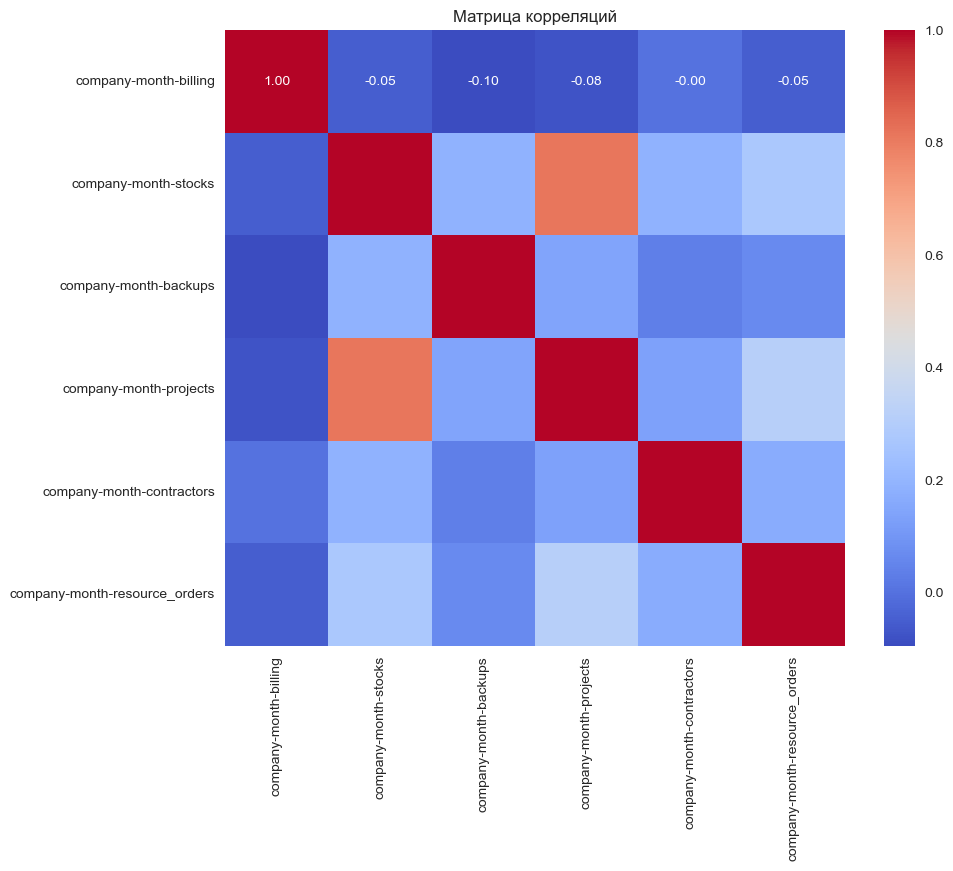

In [39]:
# Построение тепловой карты (heatmap) для визуализации корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

***Вывод:*** Отмечается высокая степень тесноты связей между столбцами Company-month-stocks и Company-month-projects, что может указывать на некоторую взаимосвязь между количеством складов, используемых компанией, и количеством её проектов. С другой стороны, между остальными столбцами отмечается очень слабая связь, что может указывать на их независимость или отсутствие прямой корреляции.

Расcмотрим на распределение отобранных компаний по срокам активности подписки


In [40]:
max_projects = result['company-month-projects'].max()
min_projects = result['company-month-projects'].min()
# Добавление столбца с группами по значениям 'сompany-month-projects'
result['project_groups'] = pd.cut(result['company-month-projects'], bins=[-1, 0, 50, 100, 221], labels=['0 проектов', 'до 50 проектов в месяц', 'от 51 до 100 проектов в месяц','свыше 100 проектов в месяц'])

# Группировка данных и подсчет уникальных значений
grouped_data = result.groupby('project_groups').agg({'company_id': 'nunique', 'month': 'count', 'company-month-stocks':'sum' }).reset_index()
grouped_data.columns = ['Количество проектов в месяц', 'Количество компаний', 'Количество месяцев', 'Количество складов']

print("Максимальное количество проектов в месяц:", max_projects)
print("Минимальное количество проектов в месяц:", min_projects)
grouped_data

Максимальное количество проектов в месяц: 221
Минимальное количество проектов в месяц: 0


C:\Users\Админ\AppData\Local\Temp\ipykernel_9628\1117006280.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['project_groups'] = pd.cut(result['company-month-projects'], bins=[-1, 0, 50, 100, 221], labels=['0 проектов', 'до 50 проектов в месяц', 'от 51 до 100 проектов в месяц','свыше 100 проектов в месяц'])
C:\Users\Админ\AppData\Local\Temp\ipykernel_9628\1117006280.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = result.groupby('project_groups').agg({'company_id': 'nunique', 'month': 'count', 'company-month-stocks':'sum' }).reset

,Количество проектов в месяц,Количество компаний,Количество месяцев,Количество складов
0,0 проектов,163,528,378
1,до 50 проектов в месяц,251,2177,18329
2,от 51 до 100 проектов в месяц,16,70,4486
3,свыше 100 проектов в месяц,6,11,615


Из числа компаний, продливших подписку, 163 компании не используют приложения для ведения проектов, большинство компаний ведут до 50 проектов.

Приведем характеристику наиболее массовой компании-клиента. 

In [46]:
# Объединение таблиц по столбцам company_id и id
merged_df = pd.merge(result, companies, left_on='company_id', right_on='id')

merged_df

,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders,project_groups,id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
0,408,2022-11-01 00:00:00+00:00,1,1,0,1,1,0,до 50 проектов в месяц,408,Строительство,2.0,2019-08-13 12:49:52,2023-01-09 10:42:54,2.0,False
1,408,2022-12-01 00:00:00+00:00,1,0,0,0,0,0,0 проектов,408,Строительство,2.0,2019-08-13 12:49:52,2023-01-09 10:42:54,2.0,False
2,408,2020-03-01 00:00:00+00:00,0,2,0,0,0,0,0 проектов,408,Строительство,2.0,2019-08-13 12:49:52,2023-01-09 10:42:54,2.0,False
3,408,2023-01-01 00:00:00+00:00,0,3,10,1,51,14,до 50 проектов в месяц,408,Строительство,2.0,2019-08-13 12:49:52,2023-01-09 10:42:54,2.0,False
4,408,2023-02-01 00:00:00+00:00,0,2,4,2,52,23,до 50 проектов в месяц,408,Строительство,2.0,2019-08-13 12:49:52,2023-01-09 10:42:54,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,9817,2024-01-01 00:00:00+00:00,2,7,0,2,5,5,до 50 проектов в месяц,9817,-,1.0,2024-01-23 07:15:36,2024-02-08 08:11:29,7.0,False
2782,9817,2024-02-01 00:00:00+00:00,0,5,0,5,0,0,до 50 проектов в месяц,9817,-,1.0,2024-01-23 07:15:36,2024-02-08 08:11:29,7.0,False
2783,9817,2024-03-01 00:00:00+00:00,0,1,0,6,0,0,до 50 проектов в месяц,9817,-,1.0,2024-01-23 07:15:36,2024-02-08 08:11:29,7.0,False
2784,9931,2024-02-01 00:00:00+00:00,2,11,0,6,13,13,до 50 проектов в месяц,9931,Строительство,1.0,2024-02-07 12:56:09,2024-03-04 15:55:06,2.0,False


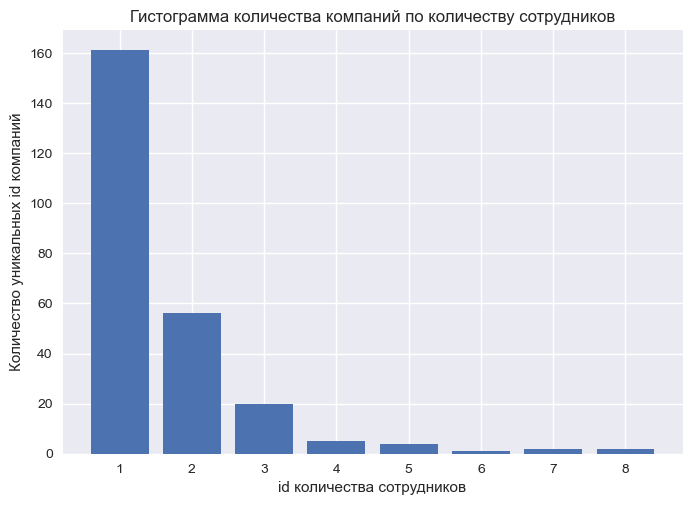

In [52]:
# Группируем данные по количеству сотрудников и подсчитываем уникальные id компаний
grouped = merged_df.groupby('employer_count_interval')['id'].nunique()

# Строим гистограмму
plt.bar(grouped.index, grouped.values)
plt.xlabel('id количества сотрудников')
plt.ylabel('Количество компаний')
plt.title('Гистограмма количества компаний по количеству сотрудников')
plt.show()

***Вывод:*** По возрастающей id от 1 до 8, количество сотрудников - (1-4, 5-10, 11-20, 21-30, 31-50, 51-100, 101-200, >201). Подавляющее большинство  компаний-клиентов имеют в штате от 1 до 4 сотрудников. Поэтому можем предположить, что с приложением работают в основном небольшие компании. 


Посмотрим, как давно зарегистрированы активные клиенты в системе. 

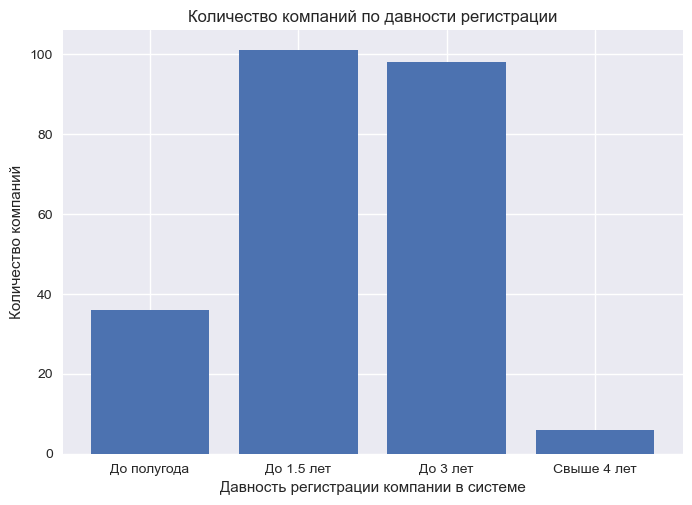

In [61]:
# Вычисление возраста компании в системе
merged_df['company_age'] = pd.Timestamp('2024-03-28') - merged_df['created_at']

# Разделение компаний на группы по возрасту
half_year = merged_df[merged_df['company_age'] < pd.Timedelta(days=182)]
one_and_half_years = merged_df[(merged_df['company_age'] >= pd.Timedelta(days=182)) & (merged_df['company_age'] < pd.Timedelta(days=547))]
three_years = merged_df[(merged_df['company_age'] >= pd.Timedelta(days=547)) & (merged_df['company_age'] < pd.Timedelta(days=1095))]
above_four_years = merged_df[merged_df['company_age'] >= pd.Timedelta(days=1460)]

# Подсчет уникальных id компаний в каждой группе
unique_ids_half_year = half_year['id'].nunique()
unique_ids_one_and_half_years = one_and_half_years['id'].nunique()
unique_ids_three_years = three_years['id'].nunique()
unique_ids_above_four_years = above_four_years['id'].nunique()

# Построение гистограммы
ages = ['До полугода', 'До 1.5 лет', 'До 3 лет', 'Свыше 4 лет']
unique_ids = [unique_ids_half_year, unique_ids_one_and_half_years, unique_ids_three_years, unique_ids_above_four_years]

plt.bar(ages, unique_ids)
plt.xlabel('Давность регистрации компании в системе')
plt.ylabel('Количество компаний')
plt.title('Количество компаний по давности регистрации')
plt.show()

***Вывод:*** Большинство компаний зарегистрированы до 1,5 и 3 лет.  

**Общий вывод:**



   1.	Файл активностей (activities.csv). Сгруппирован по компаниям, отсортирован по компаниям, а в пределах каждой компании - по месяцам. Всего в датафрейме 6316 записей. Всего в датасете 716 уникальных id компаний.   
2.	Файл платежей (billing.csv). Всего в датафрейме 3480 записей. Количество уникальных id компаний в датасете - 1836. Количество совпадающих id в датасетах activities и billing - 711. Количество id, которые есть только в датасете billing - 1125. Т.е. в датасете activities отражены активности не по всем компаниям. Предполагаем, что пропуски в дате платежа связаны с тем, что не все счета оплачены.
3.	Файл компаний (companies.csv). Всего в датафрейме 723 записей. По количеству компаний датасет не совпадает с предыдущими датасетами. Есть 7, которых нет в предыдущих датасетах. 
4.	Файл сотрудников (people.csv). Всего в датафрейме 5095 записей. Количество уникальных id компаний в датасете- 712. В результате в 4 датасетах совпадают 701 id компаний. 
5.	В данных о платежах представлена информация о регистрации за период с 23 июля 2019 года до 13 марта 2024 года. При этом дата первого платежа 16 декабря 2020 г., т.е. первая оплата произошла через 5 месяцев после первой регистрации.
6.	 Большая часть компаний выбирает подписку на срок больше 9 месяцев.
7.	В подавляющем большинстве компании-клиенты выбирают тариф старт и базовый. 566 компаний, выбравших более 1 тарифа, это компании, перешедшие с одного тарифа на другой.
8.	Если взять дату 28.03.2024 за отчетную, можно сравнить у скольких компаний подписка закончилась и сколько продлили, и посмотреть на их соотношение. Самый лучший показатель у тарифа бизнес, почти половина имевших подписку до отчетной даты, продлили ее. У остальных тарифов этот показатель на уровне 20-25%.
9.	64,2% всех компаний в датасете billing не оплатили счета, 773 - оплатили. После сравнения id оплативших  компаний из датасета billing с id компаний из датасета companies совпало 710 id. Делаем вывод, что что в датасете companies сформирована информация по компаниям-клиентам, которые совершали оплату. Но нет информации о клиентах, которые допустим, продлили подписку, но еще не оплатили счета.
10.	Если выбрать в качестве показателя ухода компании дату продления, на 28 марта 2024 г. осталось 440 компаний-клиентов. Из них о 333компании есть информация в датасете activities. Указанные компании очень мало используют функционал приложения для выставления счетов, в среднем компании используют в месяц 8 складов, работают с 10 контрагентами и 17 раз заказывают материалы. Установлена некоторая взаимосвязь между количеством складов, используемых компанией, и количеством её проектов. 
11.	Из числа компаний, продливших подписку, 163 компании не используют приложения для ведения проектов, большинство компаний ведут до 50 проектов.
12.	Подавляющее большинство компаний-клиентов имеют в штате от 1 до 4 сотрудников. Поэтому можем предположить, что с приложением работают в основном небольшие компании.
13.	Большинство компаний зарегистрированы в системе до 1,5 и 3 лет.


Для определения причин оттока клиентов можно предложить: 
1. Собрать обратную связь от клиентов
2. Проведение АБ-тестов. Если предположить, что покупатели уходят из-за высоких цен, можно проверить гипотезу. Одной части ушедших клиентов отправить рассылку с промокодом на покупки, а второй — нет. Если клиенты, которым отправили промокод, возвращаются чаще, чем те, кому не отправили, гипотеза верна.
3. Спросить у сотрудников, которые общаются с клиентами
4. Мониторить отзывы о компании в интернете